# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras.utils import plot_model

# Dataset

In [ ]:
train = pd.read_csv("drive/MyDrive/mnist_train.csv")
test = pd.read_csv("drive/MyDrive/mnist_test.csv")
print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (60000, 785)
Test Shape:  (10000, 785)


In [ ]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


## Visualisasi Label/Kelas

In [ ]:
kelas = list(train["label"].unique())
print("Kelas pada data:", kelas)
print("Secara urut:", np.sort(np.array(kelas)))

Kelas pada data: [5, 0, 4, 1, 9, 2, 3, 6, 7, 8]
Secara urut: [0 1 2 3 4 5 6 7 8 9]


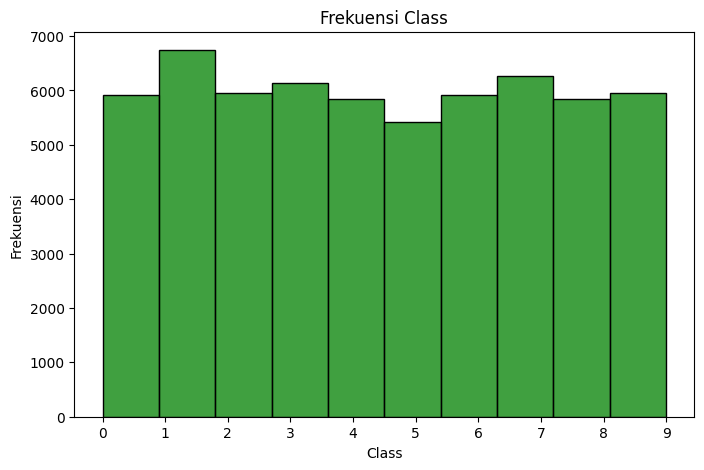

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(train["label"], kde=False, color='green', binwidth=0.9)
plt.xticks(range(min(train["label"]), max(train["label"])+1))
plt.title('Frekuensi Class')
plt.xlabel('Class')
plt.ylabel('Frekuensi')
plt.show()

# Tes Menampilkan Gambar

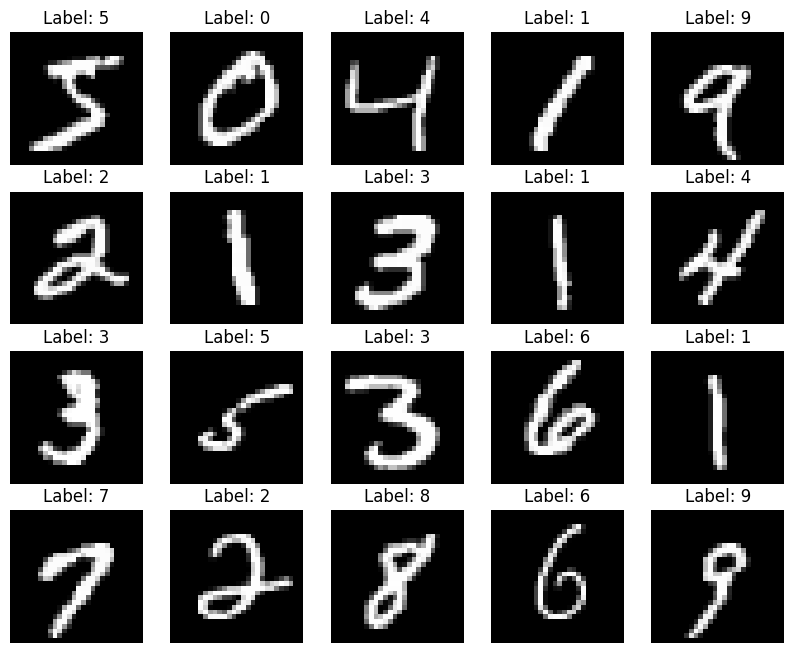

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i+1)
  plt.title("Label: {}".format(train["label"][i]))
  plt.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
  plt.axis('off')
plt.show()

# Model

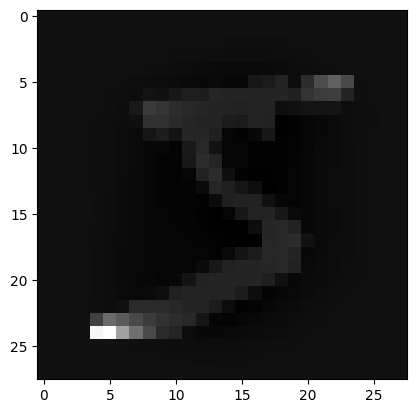

In [ ]:
y_train = train["label"]
y_test = test["label"]
X_train = train.drop(columns="label")
X_test = test.drop(columns="label")
X_train = X_train / 255
X_test = X_test / 255
X_train = scale(X_train)
X_test = scale(X_test)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')

## K-Nearest Neighbors

In [ ]:
accuracy_values = []
n_neighbors_range = range(1, 6)

for n_neighbors in n_neighbors_range:
  knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_values.append(accuracy)

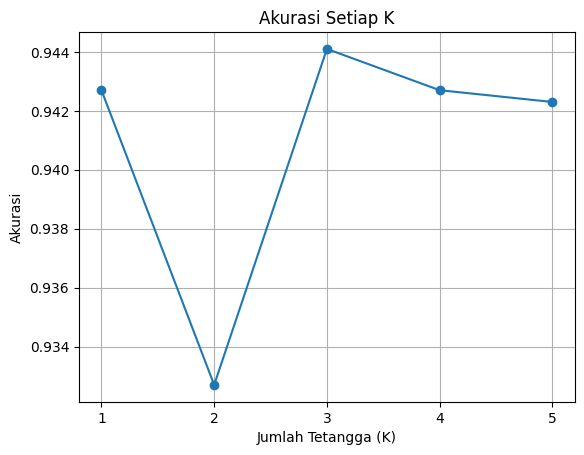

In [ ]:
plt.plot(n_neighbors_range, accuracy_values, marker='o')
plt.title('Akurasi Setiap K')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(n_neighbors_range)
plt.grid()
plt.show()

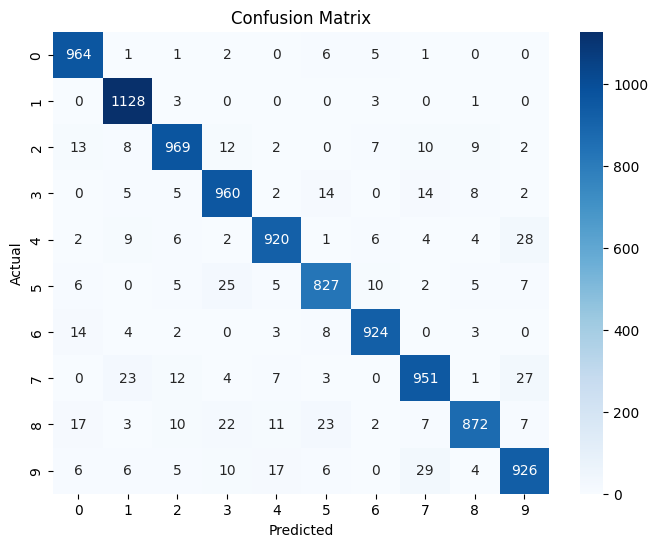

In [ ]:
best_n_neighbors = n_neighbors_range[accuracy_values.index(max(accuracy_values))]
knn_model = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.sort(np.array(kelas)), yticklabels=np.sort(np.array(kelas)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("Akurasi:", knn_accuracy)

Akurasi: 0.9441


## Random Forest Classifier

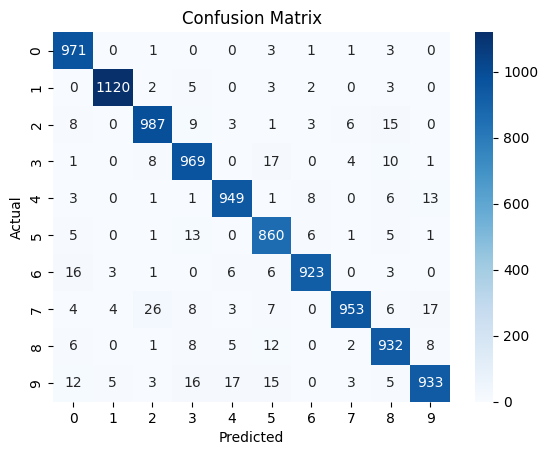

In [ ]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
RFC_accuracy = accuracy_score(y_test, y_pred)
RFC_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(RFC_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.sort(np.array(kelas)), yticklabels=np.sort(np.array(kelas)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("Akurasi:", RFC_accuracy)

Akurasi: 0.9597


## Support Vector Machine (SVM)

In [ ]:
svm_model_linear = SVC(kernel = 'linear', random_state=0)
svm_model_rbf = SVC(kernel = 'rbf', random_state=0)
svm_model_linear.fit(X_train, y_train)
svm_model_rbf.fit(X_train, y_train)
y_pred_linear = svm_model_linear.predict(X_test)
y_pred_rbf = svm_model_rbf.predict(X_test)
print("Akurasi kernel linear:", accuracy_score(y_test, y_pred_linear))
print("Akurasi kernel rbf:", accuracy_score(y_test, y_pred_rbf))

Akurasi kernel linear: 0.928
Akurasi kernel rbf: 0.9656


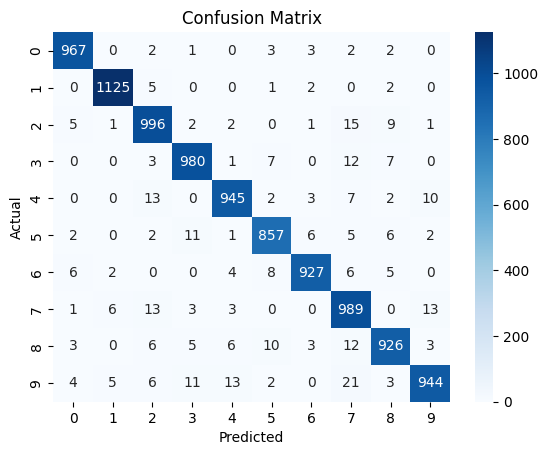

In [ ]:
svm_accuracy = max(accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_rbf))
if svm_accuracy == accuracy_score(y_test, y_pred_linear):
  svm_cm = confusion_matrix(y_test, y_pred_linear)
else:
  svm_cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.sort(np.array(kelas)), yticklabels=np.sort(np.array(kelas)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Convolutional Neural Network (CNN)

In [ ]:
X_train_r = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_r = X_test.reshape((X_test.shape[0], 28, 28, 1))
y_train_r = to_categorical(y_train)
y_test_r = to_categorical(y_test)
print("X_train Shape:", X_train_r.shape)
print("X_test Shape:", X_test_r.shape)
print("y_train Shape:", y_train_r.shape)
print("y_test Shape:", y_test_r.shape)

X_train Shape: (60000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)
y_train Shape: (60000, 10)
y_test Shape: (10000, 10)


In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28,1)))
cnn_model.add(MaxPool2D(pool_size=2))
cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))
# cnn_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
# cnn_model.add(MaxPool2D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(256,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(len(kelas),activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1

In [ ]:
history = cnn_model.fit(X_train_r, y_train_r, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 106s 81ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0604 - val_accuracy: 0.9848
Epoch 2/10
1313/1313 [==============================] - 82s 63ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0610 - val_accuracy: 0.9865
Epoch 3/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0599 - val_accuracy: 0.9865
Epoch 4/10
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0711 - val_accuracy: 0.9864
Epoch 5/10
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0868 - val_accuracy: 0.9864
Epoch 6/10
1313/1313 [==============================] - 82s 63ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0782 - val_accuracy: 0.9873
Epoch 7/10
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.0852 

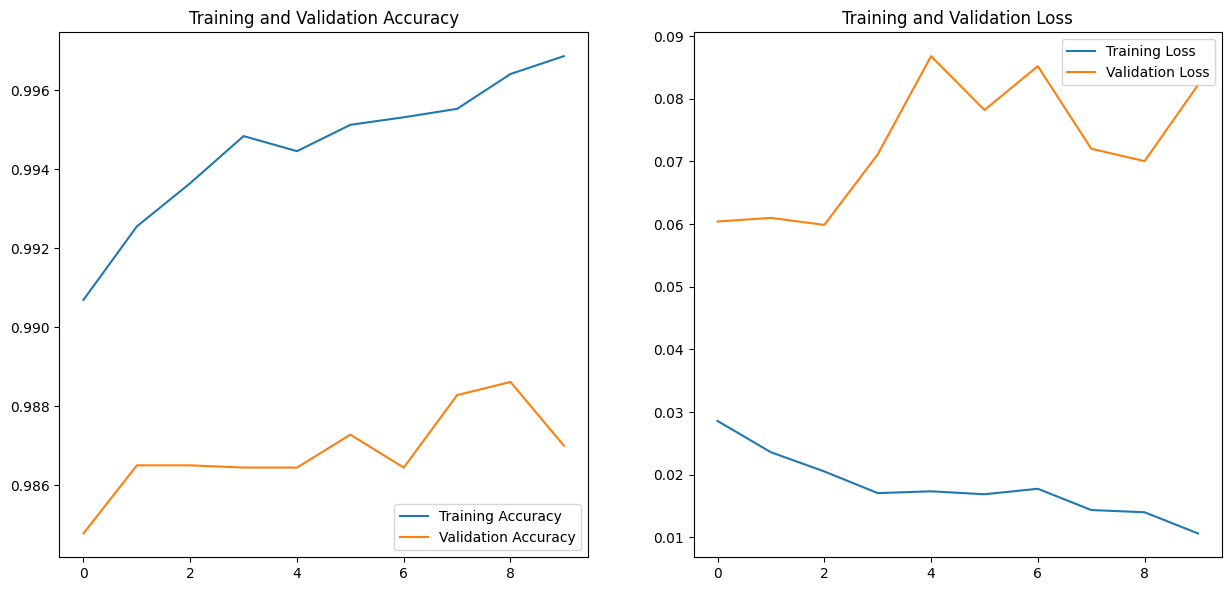

In [ ]:
epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

313/313 [==============================] - 4s 12ms/step


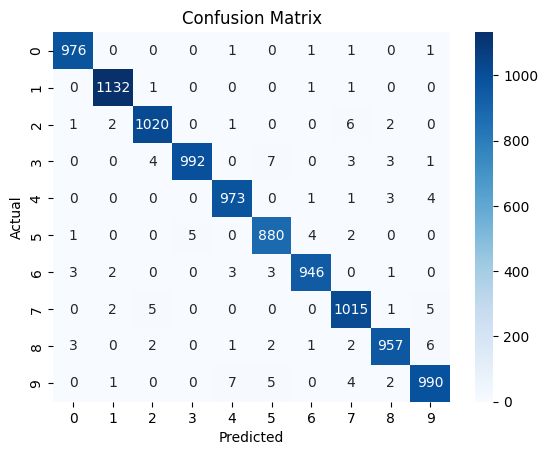

In [ ]:
test_loss, test_acc = cnn_model.evaluate(X_test_r, y_test_r)
y_pred = cnn_model.predict(X_test_r)
cnn_cm = confusion_matrix(np.argmax(y_test_r, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.sort(np.array(kelas)), yticklabels=np.sort(np.array(kelas)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("Akurasi:", test_acc)
print("Loss:", test_loss)

Akurasi: 0.988099992275238
Loss: 0.06731095910072327


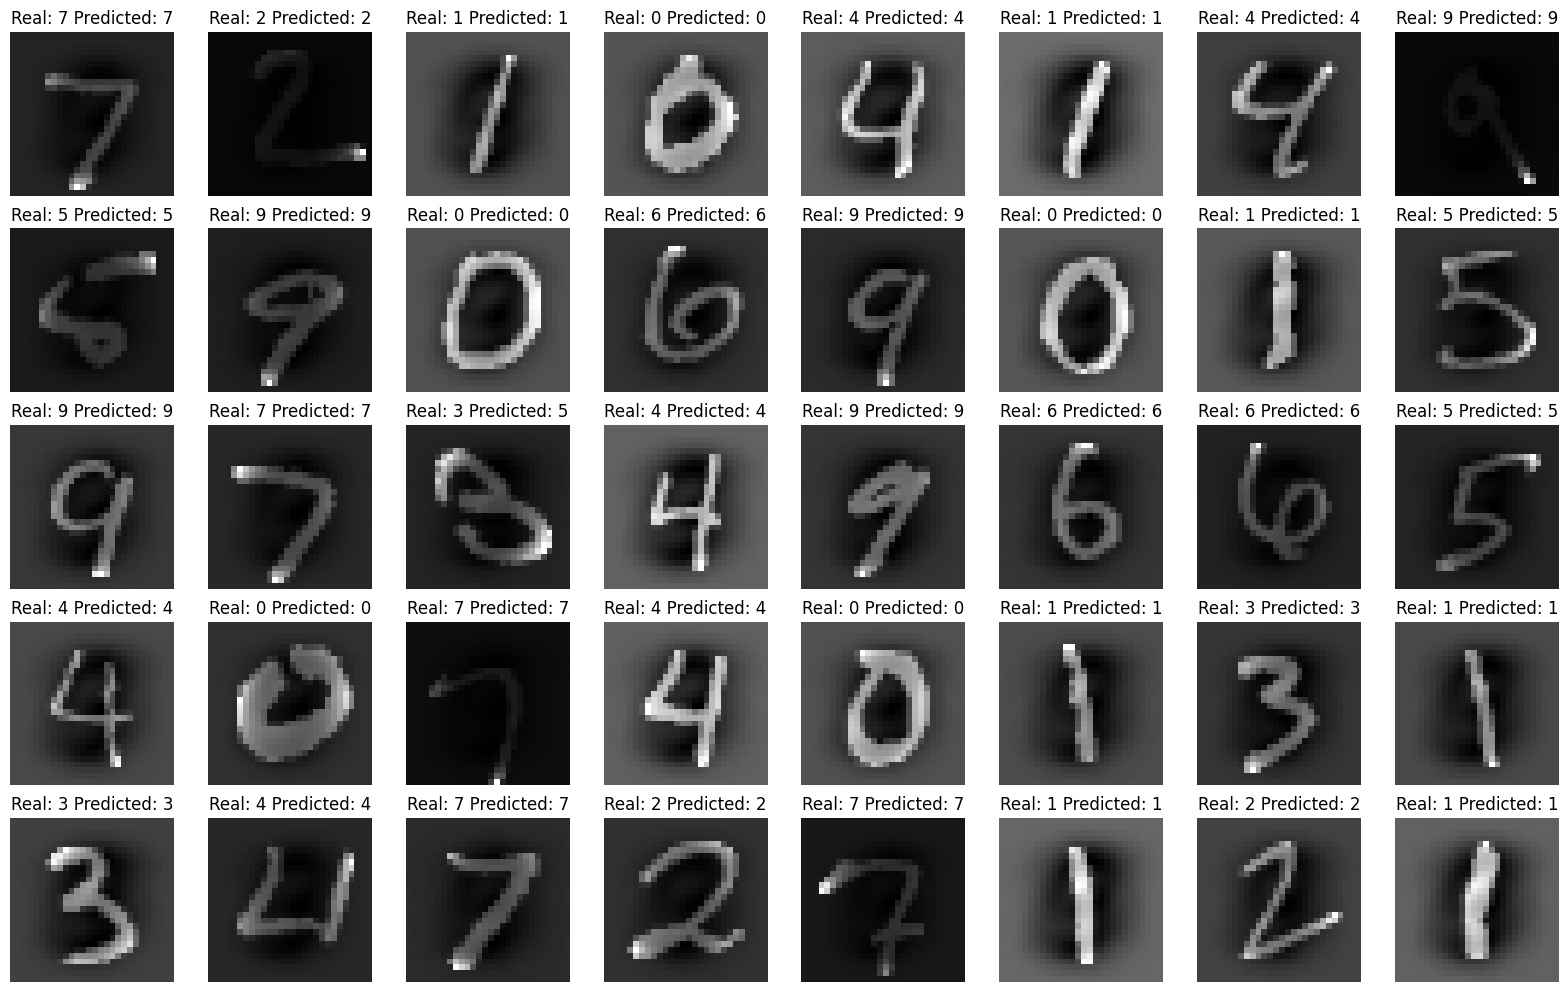

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(40):
  plt.subplot(8, 8, i+1)
  plt.title("Real: {} Predicted: {}".format(np.argmax(y_test_r[i]), np.argmax(y_pred[i])))
  plt.imshow(X_test_r[i], cmap="gray")
  plt.axis('off')
plt.show()

# Accuracy Comparison

In [ ]:
table_com = pd.DataFrame({"Model":["KNN", "Random Forest", "SVM", "CNN"],
                          "Akurasi":[knn_accuracy, RFC_accuracy, svm_accuracy, test_acc]})
table_com

,Model,Akurasi
0,KNN,0.9441
1,Random Forest,0.9597
2,SVM,0.9656
3,CNN,0.9881


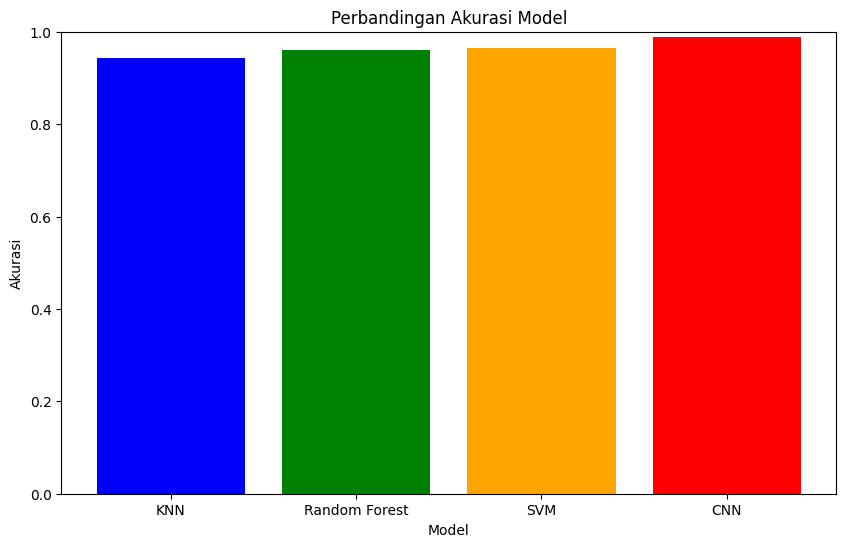

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(table_com["Model"], table_com["Akurasi"], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)
plt.show()

# Save Model

In [ ]:
cnn_model.save('drive/MyDrive/number_recognition.h5')